<b>Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\PCA\wine.csv')

In [3]:
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

<b>EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.describe(include='all')

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

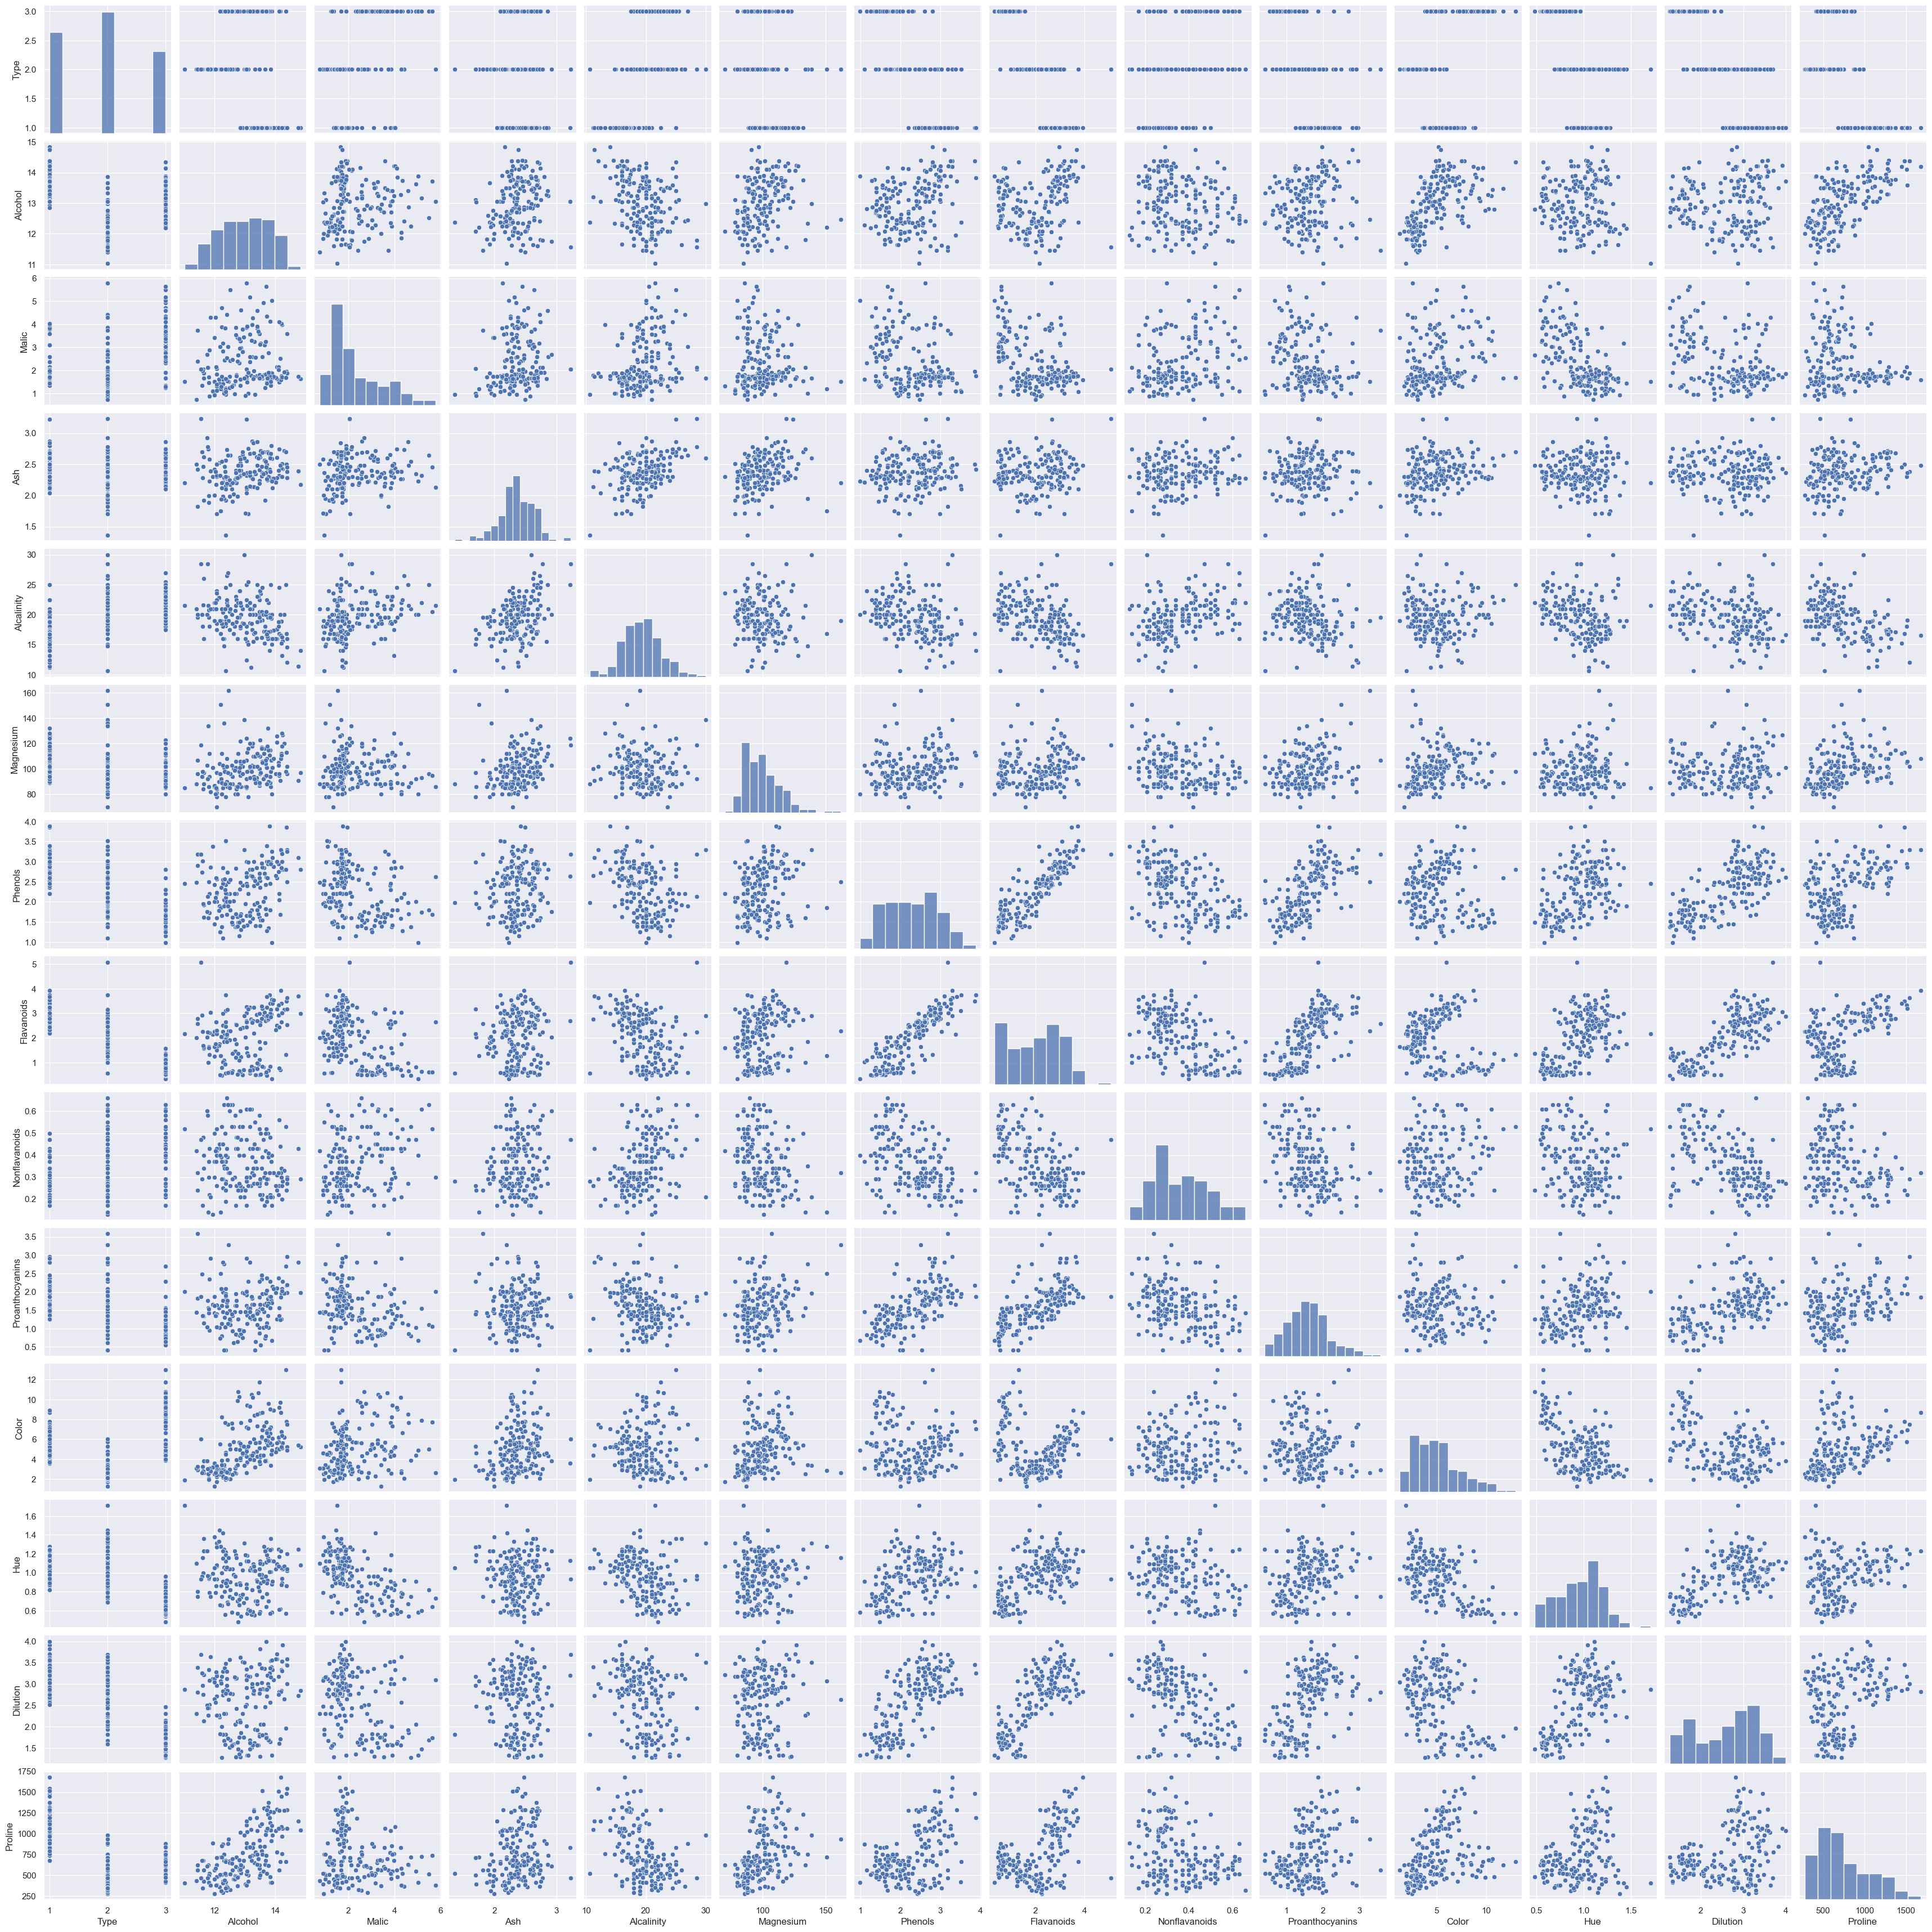

In [7]:
sns.pairplot(data)

<b>DATA PREPROCESSING

In [8]:
from sklearn.preprocessing import StandardScaler
data_scale = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scale,columns=data.columns)
data_scaled

Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0   -1.213944  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1   -1.213944  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2   -1.213944  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3   -1.213944  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4   -1.213944  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...       ...         ...        ...       ...   
173  1.373864  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  1.373864  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  1.373864  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  1.373864  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.373864  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 14 columns]

<b><h2>PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)

In [10]:
data_pca = pca.fit_transform(data_scaled)
data_pca

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [11]:
data_PCA = pd.DataFrame(data_pca[:,0:3],columns=['PC1','PC2','PC3'])
data_PCA

PC1       PC2       PC3
0   -3.522934 -1.453098 -0.164795
1   -2.528858  0.330019 -2.026707
2   -2.785029 -1.036936  0.983238
3   -3.922588 -2.768210 -0.174968
4   -1.407511 -0.867773  2.025829
..        ...       ...       ...
173  3.627996 -2.206617 -0.343668
174  2.942729 -1.752263  0.207480
175  3.027272 -2.756040 -0.940803
176  2.755222 -2.293784 -0.550474
177  3.496336 -2.760608  1.013151

[178 rows x 3 columns]

In [12]:
#Variance Ratio
variance = pca.explained_variance_ratio_
variance

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [13]:
#Cumulated Variance
cum_var = np.cumsum(variance*100)
cum_var

array([39.54248599, 57.3787449 , 67.70784649, 74.33583098, 80.60370611,
       85.40926568, 89.36497253, 91.8652166 , 93.96908761, 95.8427026 ,
       97.45590561, 98.66159643, 99.58705485])

In [14]:
#Variance Plot
import plotly.express as px
fig = px.line(cum_var,markers=True,width=500,height=400)
fig.update_layout(xaxis_title='Cummulative Variance',yaxis_title='Number of components')
fig.show()

<b>The first principle component explains 57.37% of variance in the dataset<br>
<b>First three principle components capture/explain 67.7% of the total variance in the data given

In [15]:
#Scree Plot
eigen_values = pca.explained_variance_ratio_
fig = px.line(eigen_values,markers=True,width=500,height=400)
fig.update_layout(xaxis_title='Eigen Values',yaxis_title='Number of components')
fig.show()

<b>The Scree Plot starts to flatten after 4 PCA components, it would to good to choose between 4 to 7 but as per problem statement let us choose 3

In [16]:
fig = px.scatter_3d(data_PCA,x='PC1',y='PC2',z='PC3',color='PC1')
fig.show()

<b><h1>PCA + CLUSTERING

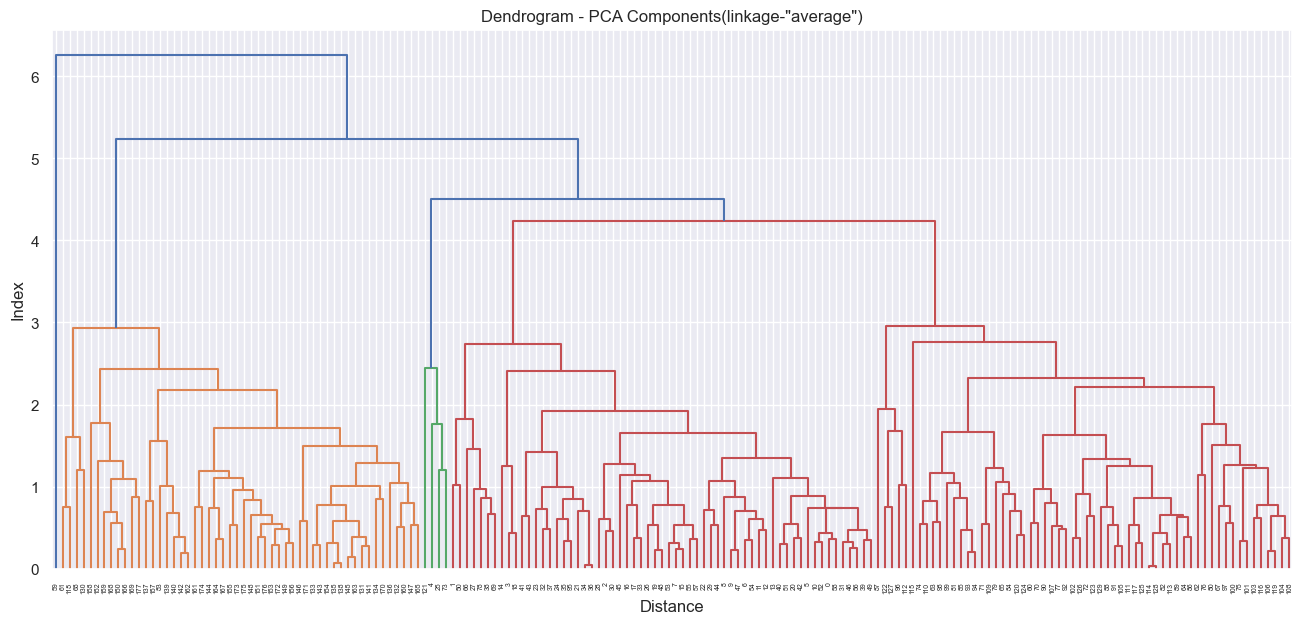

In [17]:
#Hierarchical Clustering - from PCA components
#linkage = 'average'
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,7))
dendrogram = sch.dendrogram(sch.linkage(data_PCA,method='average',metric='euclidean'))
plt.xlabel('Distance')
plt.ylabel('Index')
plt.title(f'Dendrogram - PCA Components(linkage-"average")')
plt.show()

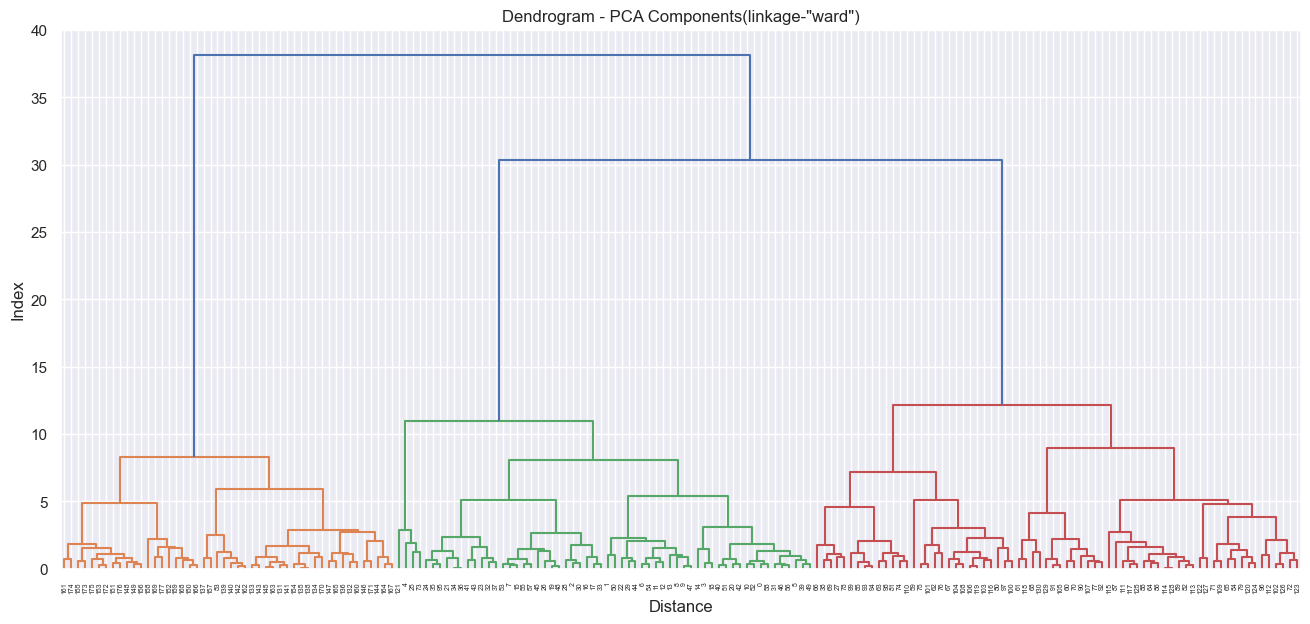

In [18]:
#linkage = 'ward'
plt.figure(figsize=(16,7))
dendrogram = sch.dendrogram(sch.linkage(data_PCA,method='ward',metric='euclidean'))
plt.xlabel('Distance')
plt.ylabel('Index')
plt.title(f'Dendrogram - PCA Components(linkage-"ward")')
plt.show()

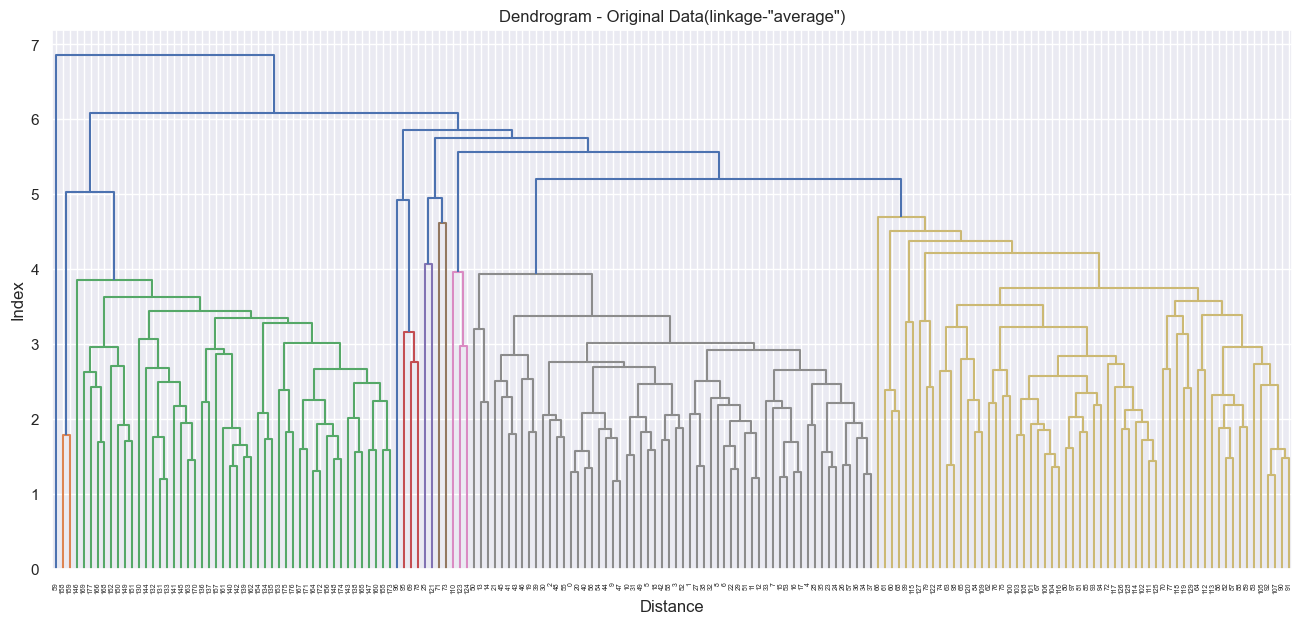

In [19]:
#Hierarchical Clustering - from Original data
#linkage = 'average'
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method='average',metric='euclidean'))
plt.xlabel('Distance')
plt.ylabel('Index')
plt.title(f'Dendrogram - Original Data(linkage-"average")')
plt.show()

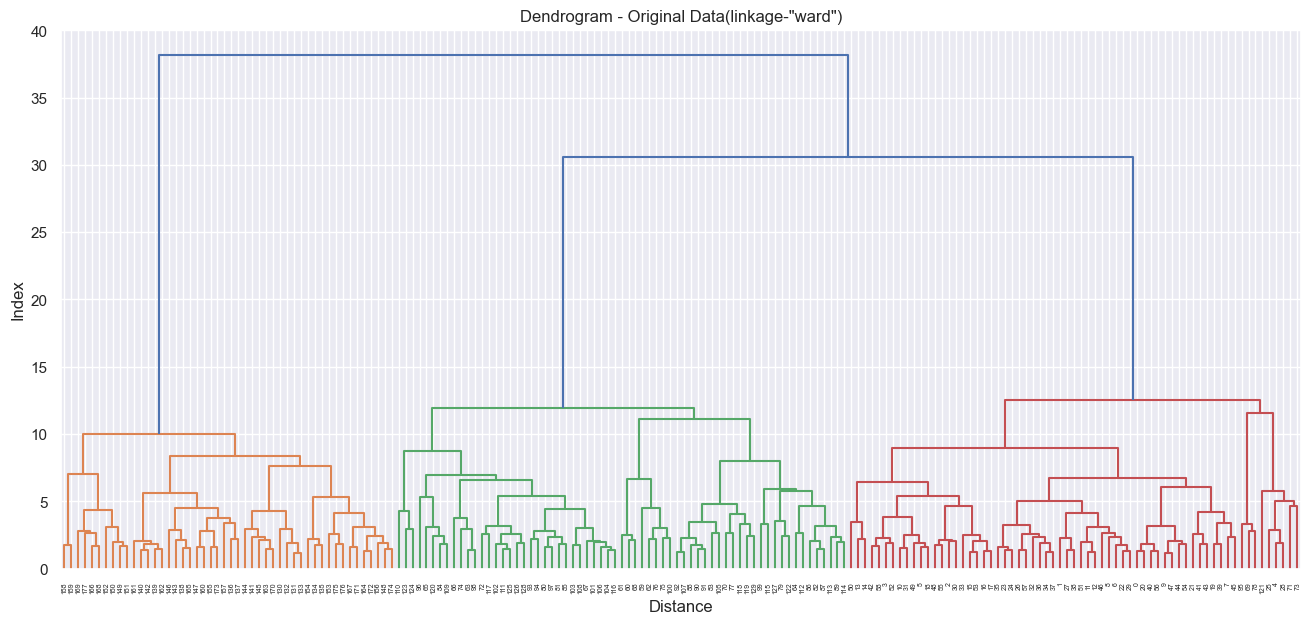

In [20]:
#linkage = 'ward'
plt.figure(figsize=(16,7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method='ward',metric='euclidean'))
plt.xlabel('Distance')
plt.ylabel('Index')
plt.title(f'Dendrogram - Original Data(linkage-"ward")')
plt.show()

<b>From Dendrogram:<br>
<b>PCA Components : Aveage - 4 clusters , Ward - 3 Clusters<br>
<b>PCA Components : Aveage - 4 clusters , Ward - 3 Clusters

In [21]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [22]:
#PCA Coponents
#linkage='average'
cluster_h = AgglomerativeClustering(n_clusters=3,linkage='average',metric='euclidean').fit(data_PCA)
cluster_labels = pd.Series(cluster_h.labels_)
print('Silhouette Score:',silhouette_score(data_PCA,cluster_labels),'Davies Bouldin Score:',davies_bouldin_score(data_PCA,cluster_labels))

Silhouette Score: 0.41176259538403825 Davies Bouldin Score: 0.6957694694258976


In [23]:
#linkage='ward'
cluster_h2 = AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean').fit(data_PCA)
cluster_labels2 = pd.Series(cluster_h2.labels_)
print('Silhouette Score:',silhouette_score(data_PCA,cluster_labels2),'Davies Bouldin Score:',davies_bouldin_score(data_PCA,cluster_labels2))

Silhouette Score: 0.4788240730180451 Davies Bouldin Score: 0.7859246075615824


In [24]:
#Original Data
#linkage='average'
cluster_h3 = AgglomerativeClustering(n_clusters=3,linkage='average',metric='euclidean').fit(data_scaled)
cluster_labels3 = pd.Series(cluster_h3.labels_)
print('Silhouette Score:',silhouette_score(data_scaled,cluster_labels3),'Davies Bouldin Score:',davies_bouldin_score(data_scaled,cluster_labels3))

Silhouette Score: 0.27088172127301097 Davies Bouldin Score: 1.0014512060022434


In [25]:
#linkage='ward'
cluster_h4 = AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean').fit(data_scaled)
cluster_labels4 = pd.Series(cluster_h4.labels_)
print('Silhouette Score:',silhouette_score(data_scaled,cluster_labels4),'Davies Bouldin Score:',davies_bouldin_score(data_scaled,cluster_labels4))

Silhouette Score: 0.3005913531964526 Davies Bouldin Score: 1.3263562067343448


In [26]:
data_h_cluster = data_PCA.copy()
data_h_cluster['h_clusters'] = cluster_labels2
data_h_cluster

PC1       PC2       PC3  h_clusters
0   -3.522934 -1.453098 -0.164795           2
1   -2.528858  0.330019 -2.026707           2
2   -2.785029 -1.036936  0.983238           2
3   -3.922588 -2.768210 -0.174968           2
4   -1.407511 -0.867773  2.025829           2
..        ...       ...       ...         ...
173  3.627996 -2.206617 -0.343668           1
174  2.942729 -1.752263  0.207480           1
175  3.027272 -2.756040 -0.940803           1
176  2.755222 -2.293784 -0.550474           1
177  3.496336 -2.760608  1.013151           1

[178 rows x 4 columns]

In [27]:
data_h_cluster['h_clusters'].value_counts()# Cluster outcome with PCA Components------(linkage='ward')

0    70
2    60
1    48
Name: h_clusters, dtype: int64

In [28]:
px.scatter_3d(data_h_cluster,x='PC1',y='PC2',z='PC3',color='h_clusters')

In [29]:
cluster_labels4.value_counts()# Cluster outcome with Original Data------(linkage='ward')

0    65
2    65
1    48
dtype: int64

<b>Both PCA and Original Data provide almost same results for n=3.Also PCA components give better results With a better SS and DBI score.Hence we can consider n=3 with PCA Components

<b><h1>KMEANS CLUSTERING

In [30]:
from sklearn.cluster import KMeans

In [31]:
#Let us fing n_clusters from elbow method fot PCA components
WCSS=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0).fit(data_PCA)
    k_clu = pd.Series(kmeans.labels_)
    WCSS.append(kmeans.inertia_)
WCSS  

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[1687.2795345522206,
 925.033928918614,
 491.23057091626674,
 407.3409593711486,
 355.90298402284634,
 312.847137003994,
 280.01129226274065,
 250.37519199681472,
 227.9422480027145]

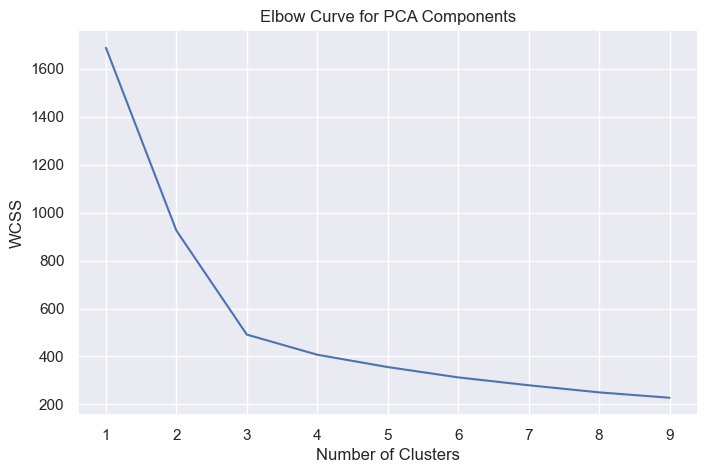

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10),WCSS,color='b')
plt.title('Elbow Curve for PCA Components')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
#Let us fing n_clusters from elbow method fot Original data
WCSS_2=[]
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i,n_init=10,random_state=0).fit(data_scaled)
    k_clu2 = pd.Series(kmeans2.labels_)
    WCSS_2.append(kmeans2.inertia_)
WCSS_2

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[2492.0,
 1727.2286609320033,
 1285.5622587402042,
 1185.8835945099509,
 1117.940979417316,
 1050.6926628102867,
 1010.0278592881933,
 959.2041244640868,
 902.2236452967874]

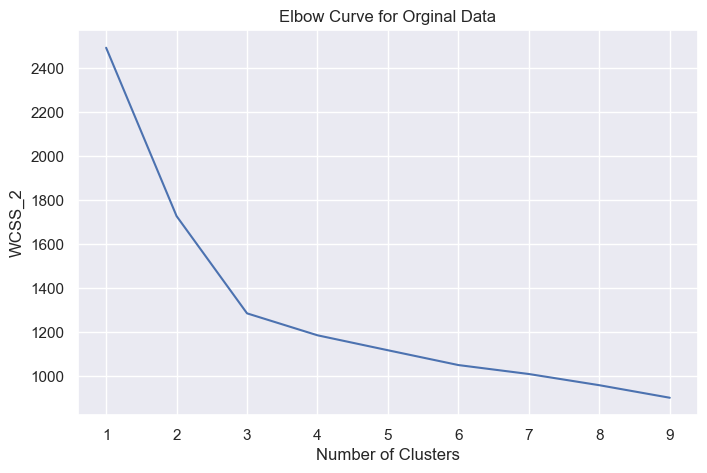

In [34]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10),WCSS_2,color='b')
plt.title('Elbow Curve for Orginal Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS_2')
plt.show()

<b>The Elbow Curve for both PCA components and Original Data starts to Flatten at n=3.Therefore we can consider Number of Clusters=3

In [35]:
k_final = KMeans(n_clusters=3,n_init=10,random_state=1).fit(data_PCA)
k_cluster_labels = pd.Series(k_final.labels_)
data_k_cluster = data_PCA.copy()
data_k_cluster['k_clusters'] = k_cluster_labels
data_k_cluster

D:\Anaconda\Installation\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



PC1       PC2       PC3  k_clusters
0   -3.522934 -1.453098 -0.164795           0
1   -2.528858  0.330019 -2.026707           0
2   -2.785029 -1.036936  0.983238           0
3   -3.922588 -2.768210 -0.174968           0
4   -1.407511 -0.867773  2.025829           0
..        ...       ...       ...         ...
173  3.627996 -2.206617 -0.343668           1
174  2.942729 -1.752263  0.207480           1
175  3.027272 -2.756040 -0.940803           1
176  2.755222 -2.293784 -0.550474           1
177  3.496336 -2.760608  1.013151           1

[178 rows x 4 columns]

In [36]:
data_k_cluster['k_clusters'].value_counts()

2    67
0    62
1    49
Name: k_clusters, dtype: int64

In [37]:
print('Silhouette Score:',silhouette_score(data_PCA,k_cluster_labels),'Davies Bouldin Score:',davies_bouldin_score(data_PCA,k_cluster_labels))

Silhouette Score: 0.4881750664935787 Davies Bouldin Score: 0.7747314050329887


In [38]:
px.scatter_3d(data_k_cluster,x='PC1',y='PC2',z='PC3',color='k_clusters')

<b>Summary<br>
<b>1-For heirarchical modelling with linkage='ward', the optimum number of clusters are 3 and equal with both original data and first three principle components.<br>
<b>2-For Kmeans clustering the Elbow method shows similar curve with increased wcss for original data .Thus the optimum number of clusters are same (n_cluster>=3) with original data and first 3 principle components.<br>
<b>3-The model performance has improved using first 3 principle components with increased silhouette score and decreased DBI